In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import itertools
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import os

In [2]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
dataset_dir_name = r"C:\Users\Baryan\Desktop\dataset"

# Get the current directory of the Python script
current_directory = os.getcwd()

# Construct the full path to the CSV file
DATADIR = os.path.join(current_directory, dataset_dir_name)

# List directories in DATADIR
CATEGORIES = [d for d in os.listdir(DATADIR) if os.path.isdir(os.path.join(DATADIR, d))]
print(CATEGORIES)
IMG_SIZE = 100

['african_elephant', 'baboon', 'camel', 'horse', 'koala', 'opossum', 'sea_lion', 'sugar_glider', 'vicuna', 'yak']


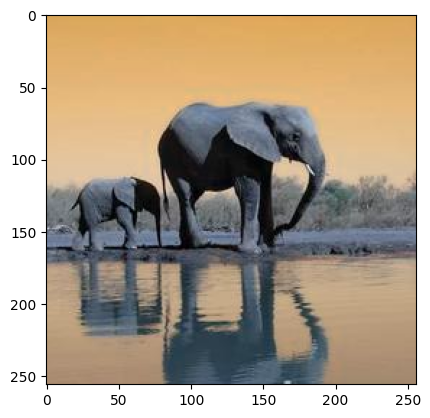

In [3]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data = []


def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


create_training_data()

In [5]:
print(len(training_data))

2938


In [6]:
lenofimage = len(training_data)

In [7]:
X = []
y = []

for image_array, label in training_data:
    X.append(image_array)
    y.append(label)
X = np.array(X).reshape(lenofimage, -1)

In [8]:
X.shape

(2938, 30000)

**flattening the array**

In [9]:
X[1]

array([40, 62, 98, ..., 12, 33, 65], dtype=uint8)

max-scaling


In [10]:
X = X / 255.0

Ex. of flattened array...

In [11]:
X[1]

array([0.15686275, 0.24313725, 0.38431373, ..., 0.04705882, 0.12941176,
       0.25490196])

note : y should be in array form compulsory.


In [12]:
y = np.array(y)

In [13]:
y.shape

(2938,)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**bayesian**

In [15]:
bayesian = GaussianNB()
bayesian.fit(X_train, y_train)
y_pred = bayesian.predict(X_test)

In [16]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.27040816326530615


In [17]:
print("Accuracy on unknown data is", classification_report(y_test, y_pred))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.41      0.23      0.30        69
           1       0.22      0.41      0.29        61
           2       0.20      0.32      0.24        50
           3       0.45      0.17      0.25        59
           4       0.26      0.21      0.23        53
           5       0.26      0.33      0.29        70
           6       0.35      0.16      0.22        76
           7       0.30      0.31      0.30        51
           8       0.19      0.31      0.23        42
           9       0.37      0.30      0.33        57

    accuracy                           0.27       588
   macro avg       0.30      0.27      0.27       588
weighted avg       0.31      0.27      0.27       588



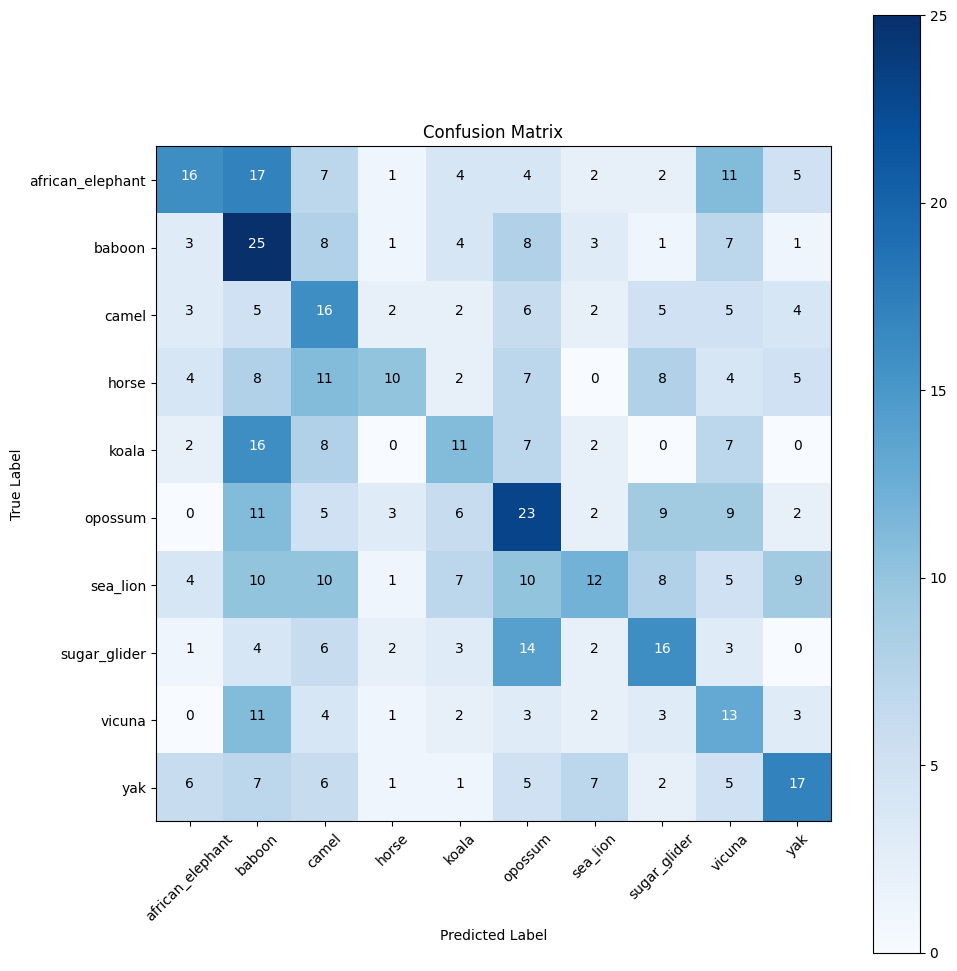

In [18]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()

using extracted **features** instead of image array for the model

In [19]:
# Load the CSV file
# The CSV file is in the same directory as your Python script
csv_file_name = "../features/haralick_features.csv"

# Get the current directory of the Python script
current_directory = os.getcwd()
# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Read the CSV file into a DataFrame
data = pd.read_csv(csv_file_path, index_col=0)

# Assuming 'classlabel' is the column containing the class labels
X = data.drop("classlabel", axis=1)  # Extract features by dropping the label column
y = data["classlabel"]  # Extract labels
# Convert the data to numpy arrays
X = X.to_numpy()
y = y.to_numpy()

In [20]:
X[0]

array([ 2.42806920e-03,  2.22585912e+02,  9.47940870e-01,  2.13713559e+03,
        4.44445071e-01,  2.61574069e+02,  8.32595646e+03,  8.06671969e+00,
        1.10834051e+01,  6.66877484e-04,  3.81808016e+00, -4.50997000e-01,
        9.99033137e-01])

In [21]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int64)

Now we are ready with our dependent and independent features, now its time for data modelling

applying train_test_split on our data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**fitting our data in SVM model**

In [23]:
bayesian = GaussianNB()
bayesian.fit(
    X_train,
    y_train,
)

GaussianNB()

**predicting the X_test**

In [24]:
y_pred = bayesian.predict(X_test)

Evaluation 

In [25]:
print("Accuracy on unknown data is", accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.19047619047619047


In [26]:
print("Accuracy on unknown data is\n", classification_report(y_test, y_pred))

Accuracy on unknown data is
               precision    recall  f1-score   support

           0       0.20      0.02      0.03        63
           1       0.19      0.16      0.17        77
           2       0.29      0.20      0.24        50
           3       0.19      0.04      0.07        72
           4       0.17      0.75      0.28        64
           5       0.40      0.03      0.06        65
           6       0.09      0.17      0.12        52
           7       0.24      0.23      0.24        47
           8       0.57      0.11      0.18        37
           9       0.39      0.20      0.26        61

    accuracy                           0.19       588
   macro avg       0.27      0.19      0.16       588
weighted avg       0.26      0.19      0.16       588



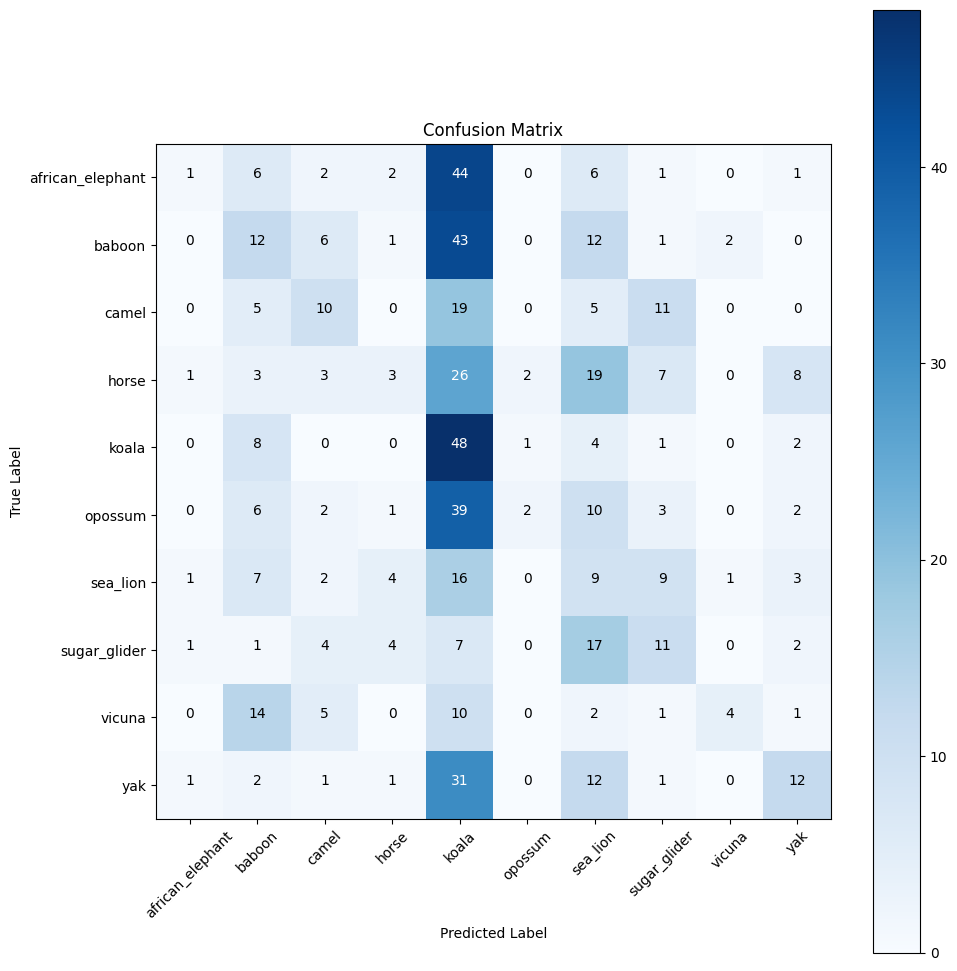

In [27]:
classes = CATEGORIES

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)


thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )

plt.tight_layout()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

plt.show()